# SVM
Support Vector Machine é um algorítimo supervisionado capaz de classificar, regredir e encontrar outliers.

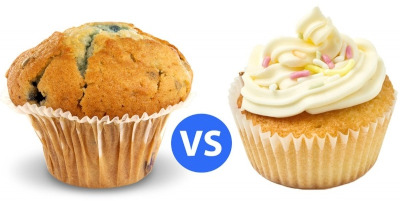

In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn import datasets
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

%matplotlib inline

In [4]:
recipes = pd.read_csv('bases/muffins_cupcakes.csv')
recipes.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,50,25,12,6,5,2,1,0
4,Muffin,55,27,3,7,5,2,1,0


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


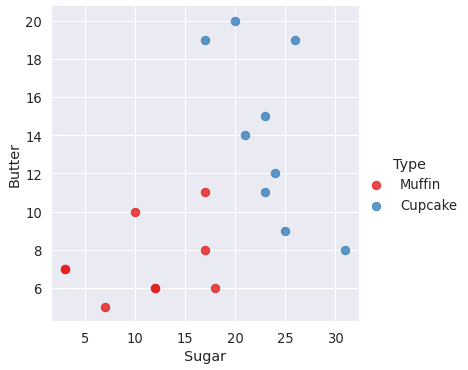

In [3]:
sns.lmplot('Sugar', 'Butter', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [5]:
ingrediente = recipes[['Sugar', 'Butter']].values
tipo = np.where(recipes['Type']=='Muffin', 0, 1)

In [6]:
model = svm.SVC(kernel='linear')
model.fit(ingrediente, tipo)

SVC(kernel='linear')

In [7]:
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(5, 30)
yy = a * xx - (model.intercept_[0]) / w[1]

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


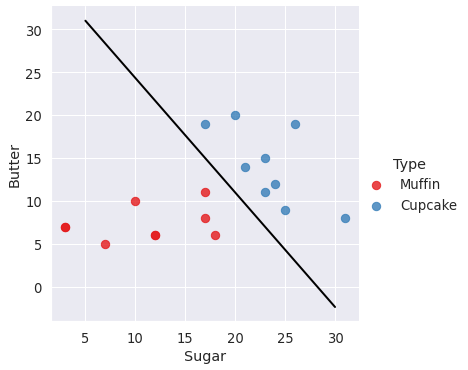

In [8]:
sns.lmplot('Sugar', 'Butter', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});
plt.plot(xx, yy, linewidth=2, color='black');

In [9]:
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


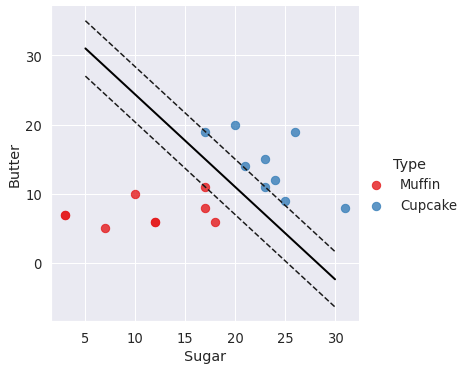

In [10]:
sns.lmplot('Sugar', 'Butter', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');

In [11]:
def muffin_ou_cupcake(sugar, butter):
    if (model.predict([[sugar, butter]])) == 0:
        print('Isto é uma receita de Muffin')
    else:
        print('Isto é uma receita de Cupcake')

In [19]:
muffin_ou_cupcake(19, 11)

Isto é uma receita de Muffin


## Retornando a Íris

In [ ]:
iris = datasets.load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                 columns=iris['feature_names'] + ['Species'])
df.head()

In [ ]:
X = df.iloc[:, :4]
y = df.Species

Parâmetros de Configuração:
* C: parâmetro de regularização
* kernel: linear, poly, rbf, sigmoid, precomputed

In [ ]:
clf = svm.SVC()
clf.fit(X, y)

In [ ]:
y_pred = clf.predict(X)
confusion_matrix(y,y_pred)

In [ ]:
clf = svm.SVC(C=1, kernel='linear')
clf.fit(X, y)

In [ ]:
y_pred = clf.predict(X)
confusion_matrix(y,y_pred)